In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# load data
grav = np.load("../data/raw/grav.npy")
ship_high = np.load("../data/raw/ship.npy")
topo_low = np.load("../data/raw/topo_low.npy")
lat = np.load("../data/raw/lat.npy")
lon = np.load("../data/raw/lon.npy")
gebco = np.load("../data/raw/gebco.npy").astype(float)

land = np.copy(gebco)
land[land < 0] = np.nan

# Define area of interest (AOI)
AOI = [90, 130, -10, 15] # Malaysia

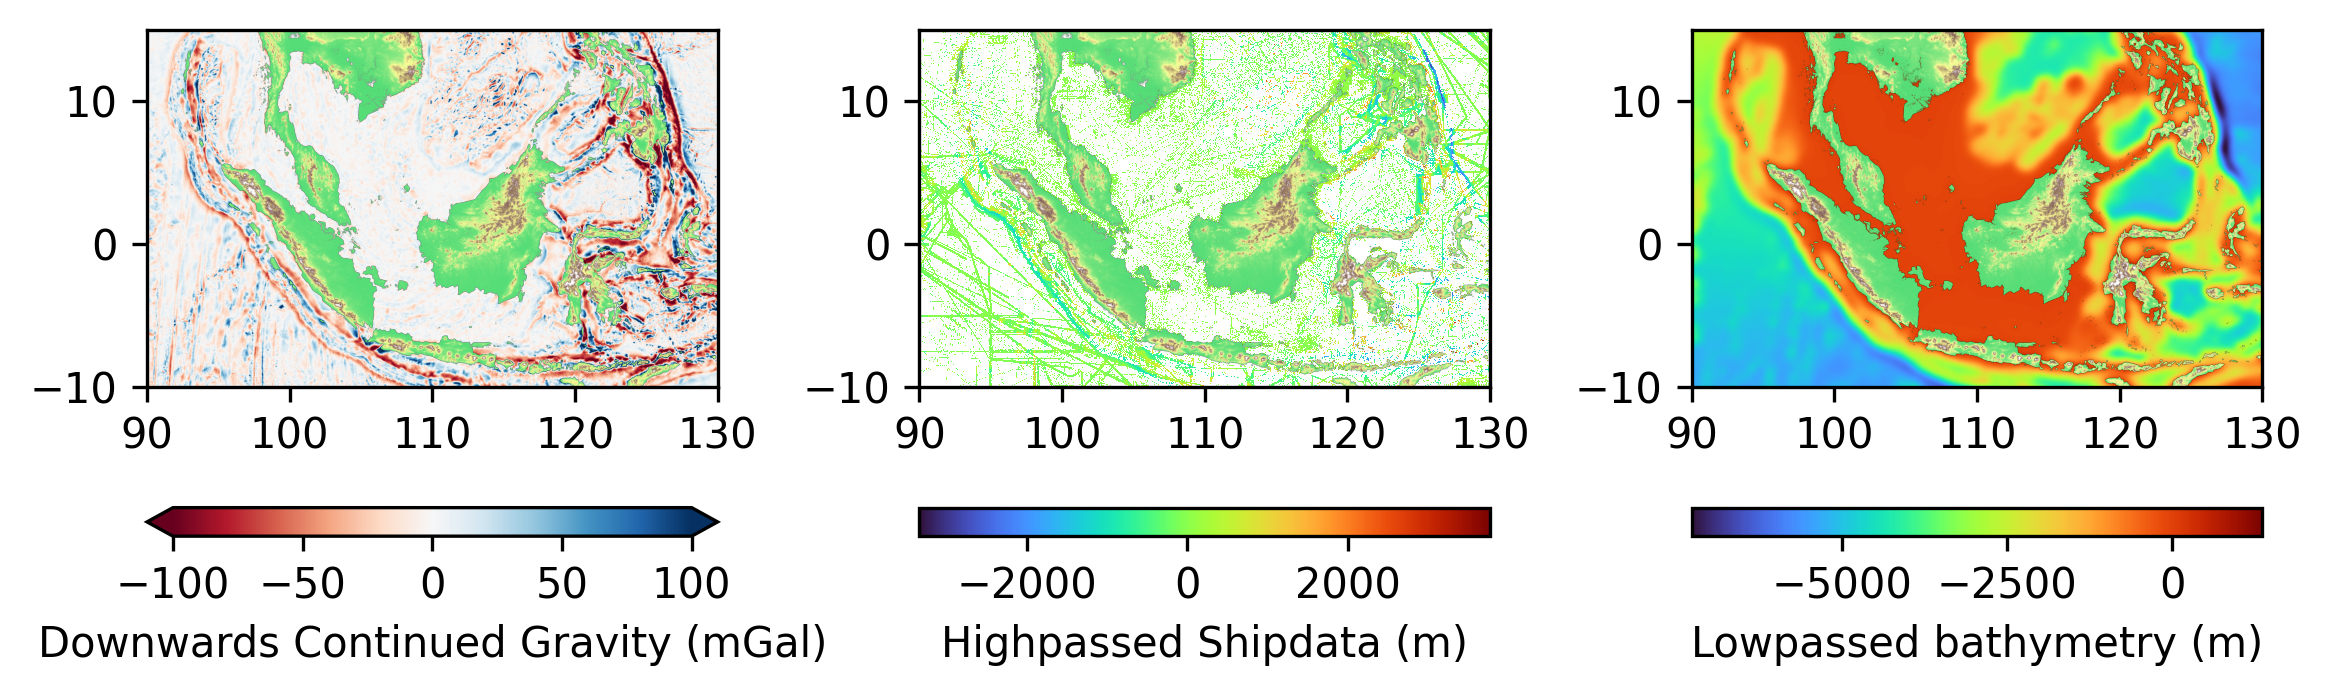

In [141]:
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 8*cm), dpi=300)

ax = fig.add_subplot(1,3,1)
sc=ax.imshow(grav, extent=AOI, origin="lower", vmin=-100, vmax=100, cmap="RdBu")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Downwards Continued Gravity (mGal)", extend="both")

ax = fig.add_subplot(1,3,2)
sc=ax.imshow(ship_high, extent=AOI, origin="lower", cmap="turbo", interpolation="none")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Highpassed Shipdata (m)")

ax = fig.add_subplot(1,3,3)
sc=ax.imshow(topo_low, extent=AOI, origin="lower", cmap="turbo")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Lowpassed bathymetry (m)")

plt.tight_layout()
plt.show()

Correlation 0.82
Slope 11.896824938034486 and mean -4.611803561317883


/var/folders/zg/8bd6l0s17cd70scnh4g4blcr0000gp/T/ipykernel_64420/3447713417.py:19: RuntimeWarning: divide by zero encountered in log10
  sc=ax.imshow(np.log10(hist[0].T), extent=[hist[1][0], hist[1][-1], hist[2][0], hist[2][-1]], origin="lower", cmap="turbo")


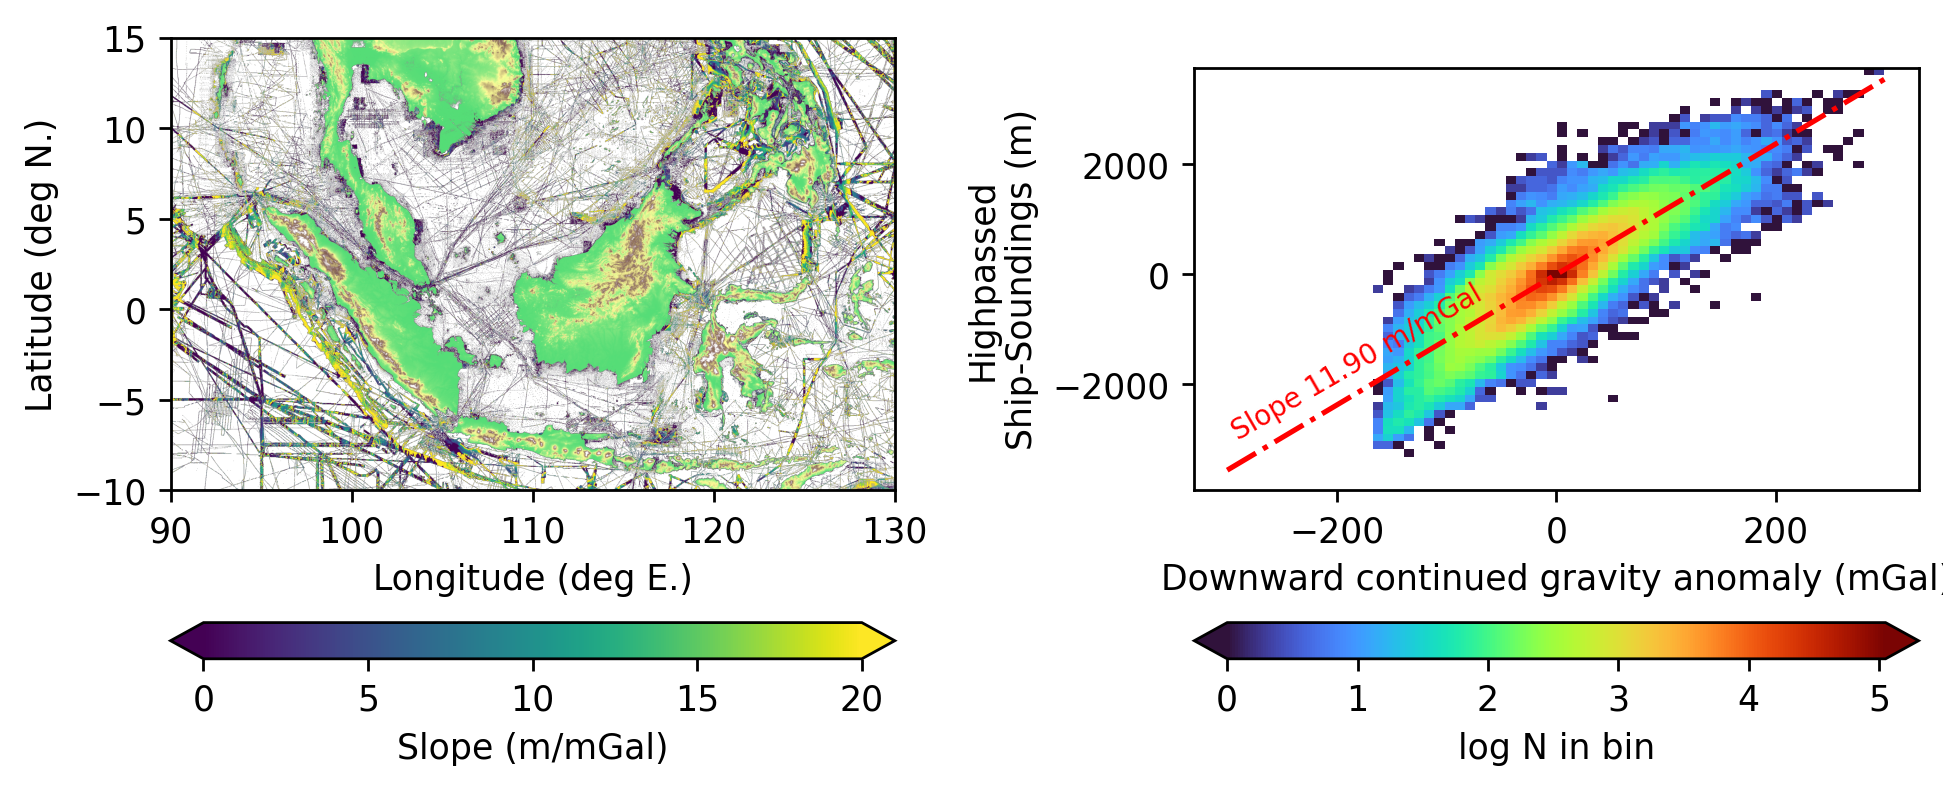

In [133]:
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 10*cm), dpi=250)

ax = fig.add_subplot(1,2,1)
sc=ax.imshow(ship_high/grav, extent=AOI, origin="lower", vmin=0, vmax=20, cmap="viridis")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Slope (m/mGal)", extend="both")
ax.set_xlabel("Longitude (deg E.)")
ax.set_ylabel("Latitude (deg N.)")

ax = fig.add_subplot(1,2,2)
a = grav.reshape(-1)
b = ship_high.reshape(-1)
mask = ~(np.isnan(a) | np.isnan(b))
print("Correlation {:.2f}".format(np.corrcoef(a[mask], b[mask])[0,1]))
fit = np.polyfit(a[mask], b[mask], 1)
print("Slope {} and mean {}".format(*fit))
hist = np.histogram2d(a[mask], b[mask], bins=50)
sc=ax.imshow(np.log10(hist[0].T), extent=[hist[1][0], hist[1][-1], hist[2][0], hist[2][-1]], origin="lower", cmap="turbo")
x = np.linspace(-300, 300, 100)
ax.plot(x, fit[1] + x*fit[0], "r-.")
ax.set_aspect(0.05)
ax.set_ylabel("Highpassed\nShip-Soundings (m)")
ax.set_xlabel("Downward continued gravity anomaly (mGal)")
plt.colorbar(sc, orientation="horizontal", label="log N in bin", extend="both")
ax.text(-300, -3000, "Slope {:.2f} m/mGal".format(*fit), color="red", rotation=30, fontsize=8)

plt.tight_layout()
plt.show()

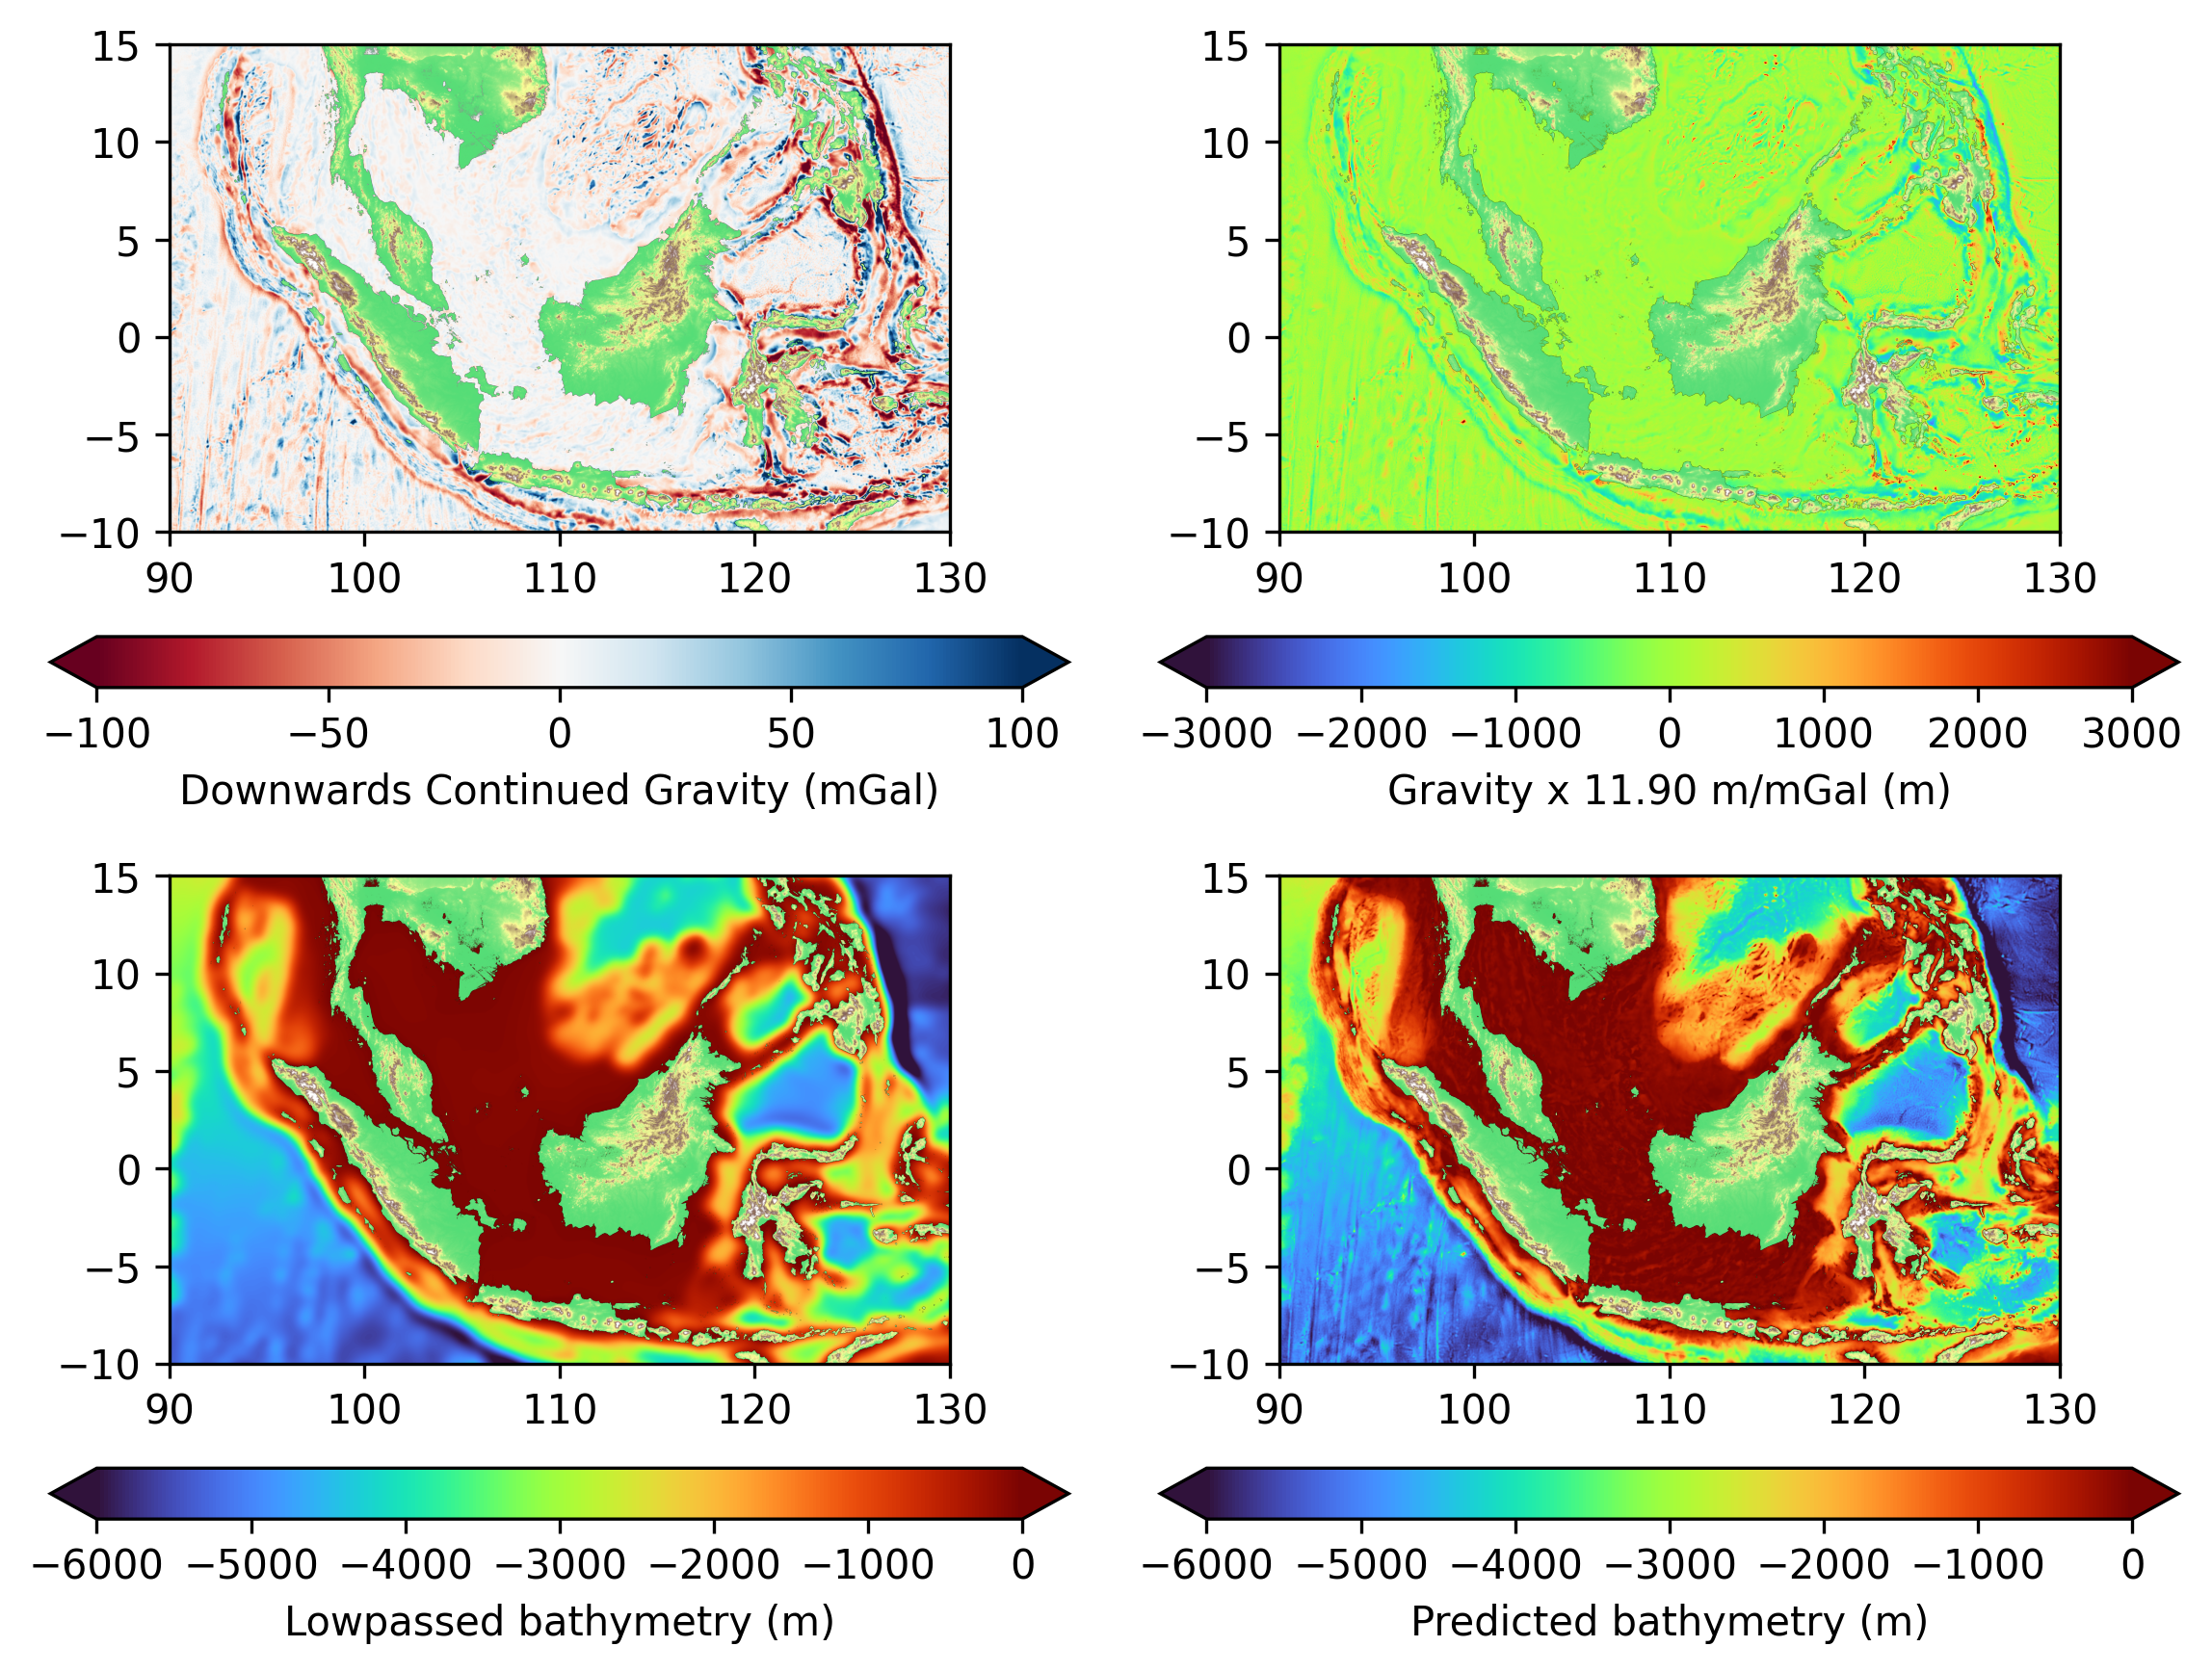

In [137]:
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm), dpi=300)

ax = fig.add_subplot(2,2,1)
sc=ax.imshow(grav, extent=AOI, origin="lower", vmin=-100, vmax=100, cmap="RdBu")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Downwards Continued Gravity (mGal)", extend="both")

ax = fig.add_subplot(2,2,2)
pred_high = grav*11.90
sc=ax.imshow(pred_high, extent=AOI, origin="lower", vmin=-3000, vmax=3000, cmap="turbo", interpolation="none")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Gravity x 11.90 m/mGal (m)", extend="both")

ax = fig.add_subplot(2,2,3)
sc=ax.imshow(topo_low, extent=AOI, origin="lower", cmap="turbo", vmin=-6000, vmax=0)
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Lowpassed bathymetry (m)", extend="both")

ax = fig.add_subplot(2,2,4)
pred = pred_high+topo_low
sc=ax.imshow(pred, extent=AOI, origin="lower", cmap="turbo", vmin=-6000, vmax=0)
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Predicted bathymetry (m)", extend="both")

plt.tight_layout()
plt.show()

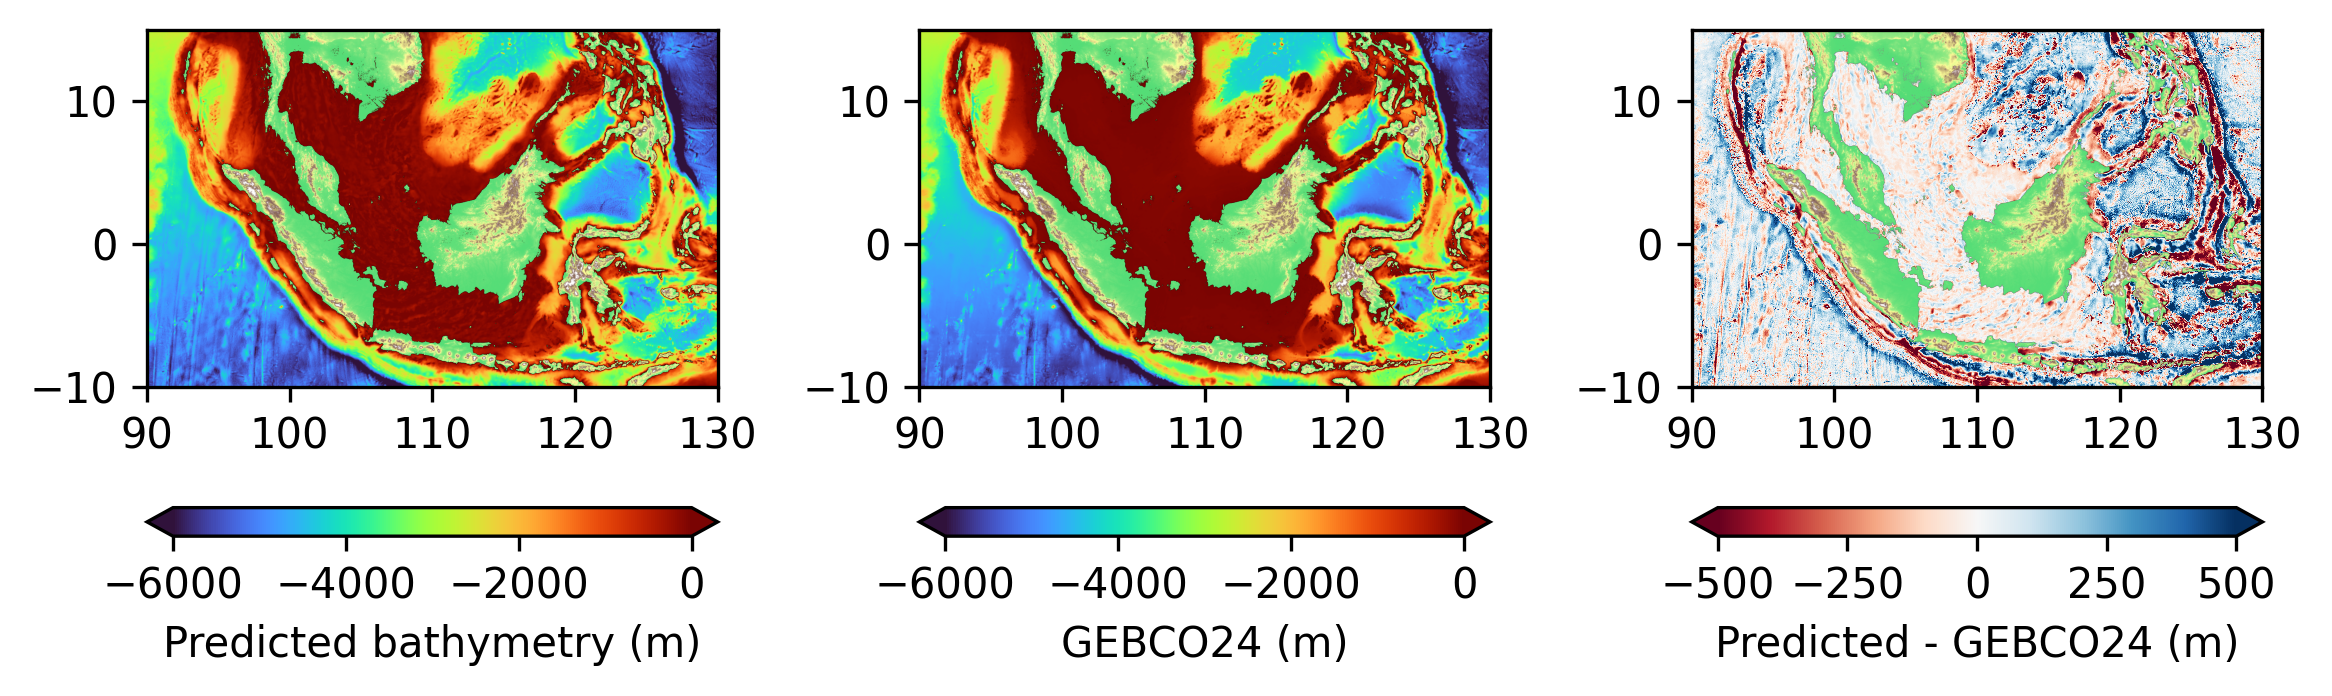

In [144]:
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 8*cm), dpi=300)

ax = fig.add_subplot(1,3,1)
sc=ax.imshow(pred, extent=AOI, origin="lower", cmap="turbo", vmin=-6000, vmax=0)
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Predicted bathymetry (m)", extend="both")

ax = fig.add_subplot(1,3,2)
sc=ax.imshow(gebco, extent=AOI, origin="lower", cmap="turbo", vmin=-6000, vmax=0)
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="GEBCO24 (m)", extend="both")

ax = fig.add_subplot(1,3,3)
sc=ax.imshow(pred - gebco, extent=AOI, origin="lower", vmin=-500, vmax=500, cmap="RdBu", interpolation="none")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Predicted - GEBCO24 (m)", extend="both")

plt.tight_layout()
plt.show()

Correlation 0.99
RMSE 249.55
Mean 4.60


/var/folders/zg/8bd6l0s17cd70scnh4g4blcr0000gp/T/ipykernel_64420/1199254390.py:20: RuntimeWarning: divide by zero encountered in log10
  sc=ax.imshow(np.log10(hist[0].T), extent=[hist[1][0], hist[1][-1], hist[2][0], hist[2][-1]], origin="lower", cmap="turbo")


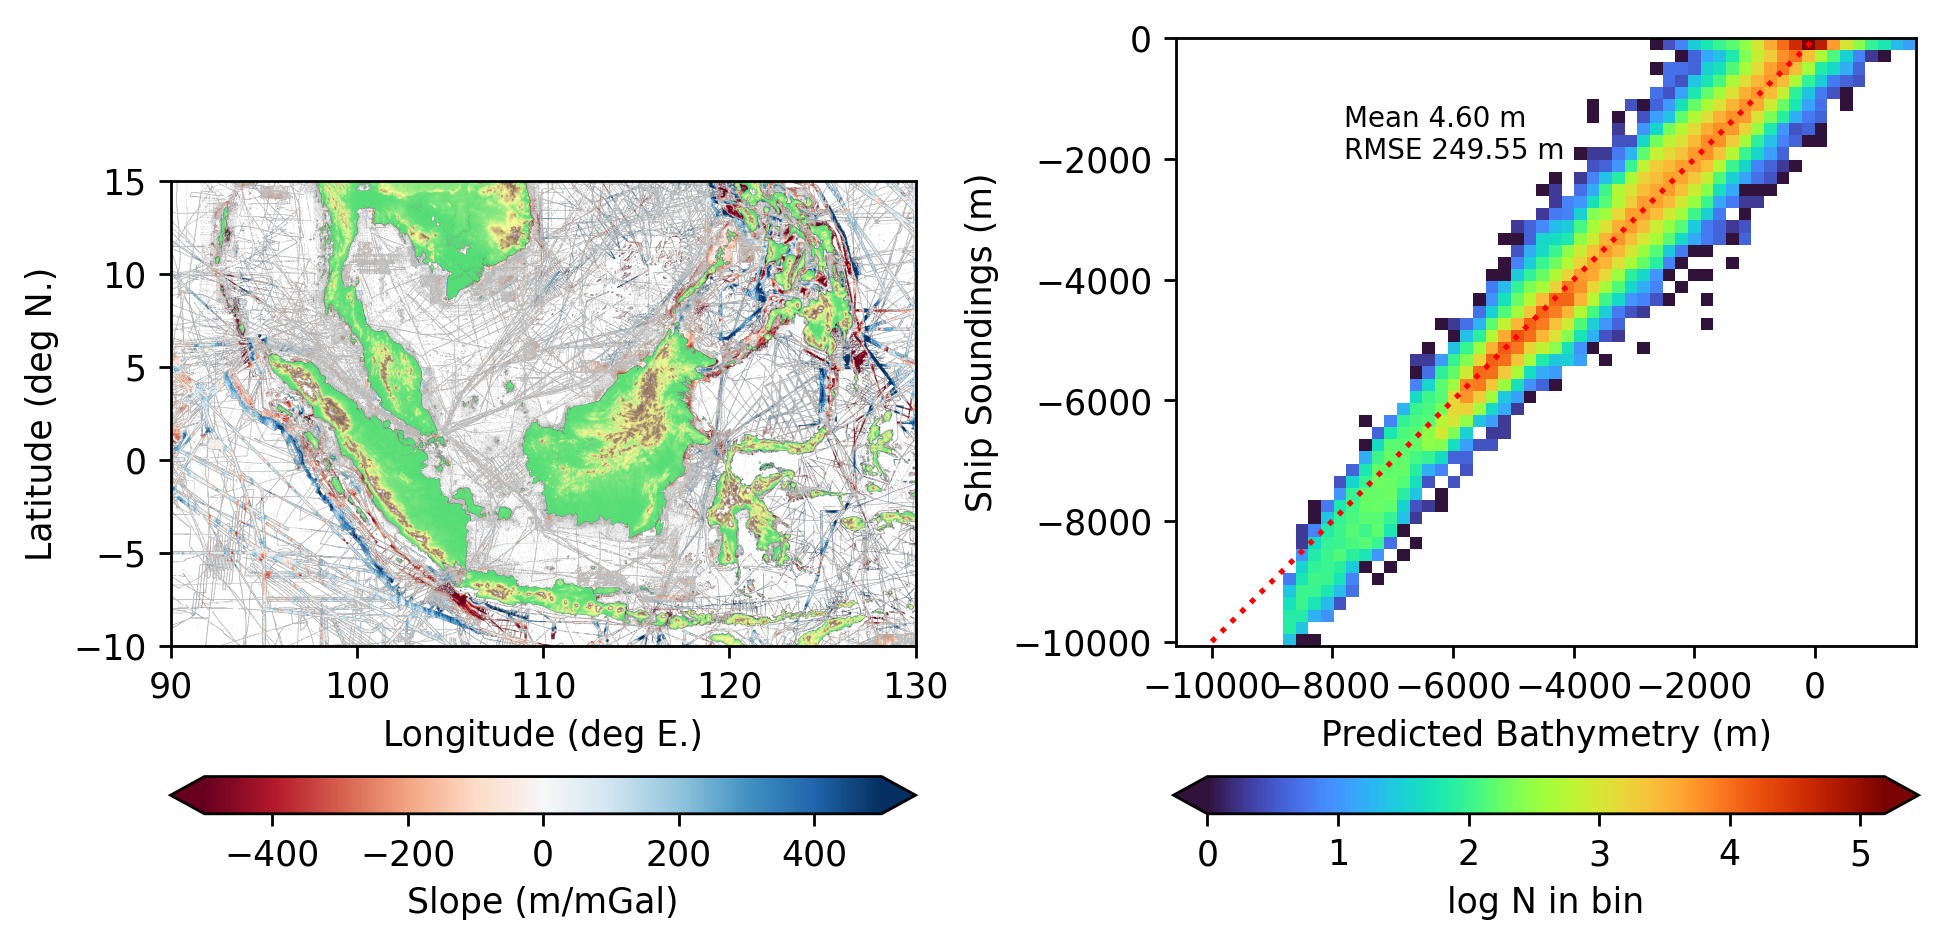

In [164]:
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 10*cm), dpi=250)

ax = fig.add_subplot(1,2,1)
sc=ax.imshow(pred_high-ship_high, extent=AOI, interpolation=None, origin="lower", vmin=-500, vmax=500, cmap="RdBu")
ax.imshow(land, extent=AOI, origin="lower", cmap="terrain", vmin=-1000, vmax=2000)
plt.colorbar(sc, orientation="horizontal", label="Slope (m/mGal)", extend="both")
ax.set_xlabel("Longitude (deg E.)")
ax.set_ylabel("Latitude (deg N.)")

ax = fig.add_subplot(1,2,2)
a = pred_high.reshape(-1) + topo_low.reshape(-1)
b = ship_high.reshape(-1) + topo_low.reshape(-1)
mask = ~(np.isnan(a) | np.isnan(b))
print("Correlation {:.2f}".format(np.corrcoef(a[mask], b[mask])[0,1]))
err = a[mask] - b[mask]
print("RMSE {:.2f}".format(np.sqrt(np.mean(err**2))))
print("Mean {:.2f}".format(np.mean(err)))
hist = np.histogram2d(a[mask], b[mask], bins=50)
sc=ax.imshow(np.log10(hist[0].T), extent=[hist[1][0], hist[1][-1], hist[2][0], hist[2][-1]], origin="lower", cmap="turbo")
ax.set_aspect(1)
#ax.set_xlim([-3000, 0])
#ax.set_ylim([-3000, 3000])
ax.plot([-10_000, 0], [-10_000, 0], "r:")
ax.set_xlabel("Predicted Bathymetry (m)")
ax.set_ylabel("Ship Soundings (m)")
plt.colorbar(sc, orientation="horizontal", label="log N in bin", extend="both")
ax.text(-7800, -2000, "Mean {:.2f} m\nRMSE {:.2f} m".format(np.mean(err), np.sqrt(np.mean(err**2))), color="k", fontsize=8)
plt.tight_layout()
plt.show()